### Bankrupt Predictions with Logistic Regression

This is an unbalanced dataset with over 90 features. So this project will use PCA and oversampling to try and improve a logistic regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from main import preprocessing, log_model, oversampler, smote, pca

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings(action="ignore")

pd.set_option("max_columns", None)

%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [5]:
df.isnull().sum().sum()

0

### Preprocessing

In [6]:
X_train, X_test, y_train, y_test = preprocessing(df)

### Logistic Regression Model

In [7]:
y_predict = log_model(X_train, X_test, y_train, y_test)

### Model Results

In [8]:
print("Accuracy Score for Logistic Regression: {}%".format(round(accuracy_score(y_test, y_predict)*100, 2)))

Accuracy Score for Logistic Regression: 96.43%


In [9]:
print("F1 for Logistic Regression: {}".format(round(f1_score(y_test, y_predict),4)))

F1 for Logistic Regression: 0.2316


In [10]:
y_test.value_counts()

0    1975
1      71
Name: Bankrupt?, dtype: int64

We can see from the value counts above in the test data that there is a big inbalance of data. The model is showing a high accuracy but a low F1 score. This accuracy score doesn't mean too much because of the imbalance. We can see from the formula below what the accuracy score would be if all predictions were made as 0. 

In [11]:
print("Accuracy score if all predictions are predicted 0: {}%".format(round(1975 / (1975 + 71)*100,2)))

Accuracy score if all predictions are predicted 0: 96.53%


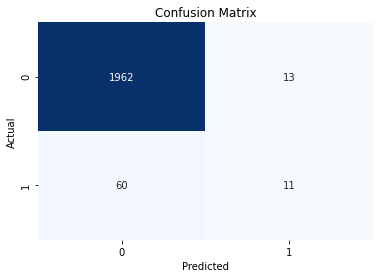

In [12]:
con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
print(classification_report(y_test, y_predict, target_names=["No Bankrupt", "Bankrupt"]))

              precision    recall  f1-score   support

 No Bankrupt       0.97      0.99      0.98      1975
    Bankrupt       0.46      0.15      0.23        71

    accuracy                           0.96      2046
   macro avg       0.71      0.57      0.61      2046
weighted avg       0.95      0.96      0.96      2046



From the matrix above, we can see the model is performing pretty poorly at predicting bankrupt. It only predicted 11 correctly out of 71. Let's now look into balancing the dataset.

### Oversampling

In [14]:
y_train.value_counts()

0    4624
1     149
Name: Bankrupt?, dtype: int64

In [15]:
X_train_os, y_train_os = oversampler(X_train, y_train)
y_train_os.value_counts()

1    4624
0    4624
Name: Bankrupt?, dtype: int64

In [16]:
y_pred_over_sample = log_model(X_train_os, X_test, y_train_os, y_test)
    

In [17]:
print("Accuracy Score for Logistic Regression: {}%".format(round(accuracy_score(y_test, y_pred_over_sample)*100, 2)))

Accuracy Score for Logistic Regression: 87.68%


In [18]:
print("F1 for Logistic Regression: {}".format(round(f1_score(y_test, y_pred_over_sample),4)))

F1 for Logistic Regression: 0.2921


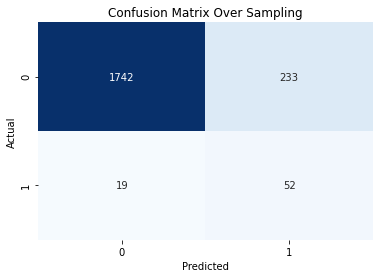

In [19]:
con_matrix_2 = confusion_matrix(y_test, y_pred_over_sample)

sns.heatmap(con_matrix_2, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Over Sampling")
plt.show()

In [20]:
print(classification_report(y_test, y_pred_over_sample, target_names=["No Bankrupt", "Bankrupt"]))

              precision    recall  f1-score   support

 No Bankrupt       0.99      0.88      0.93      1975
    Bankrupt       0.18      0.73      0.29        71

    accuracy                           0.88      2046
   macro avg       0.59      0.81      0.61      2046
weighted avg       0.96      0.88      0.91      2046



From the oversampling above, we can see a big decrease in the accuracy but the f1 score has gone up to 0.29 and it is predicting 52 bankrupt examples correctly. Even though the model has more incorrect predictions and a much lower precision, the model is still an improvement for the task we want.

### Smote

In [21]:
X_train_smote, y_train_smote = smote(X_train, y_train)
y_pred_smote = log_model(X_train_smote, X_test, y_train_smote, y_test)

In [22]:
print("Accuracy Score for Logistic Regression: {}%".format(round(accuracy_score(y_test, y_pred_smote)*100, 2)))

Accuracy Score for Logistic Regression: 88.66%


In [23]:
print("F1 for Logistic Regression: {}".format(round(f1_score(y_test, y_pred_smote),4)))

F1 for Logistic Regression: 0.3012


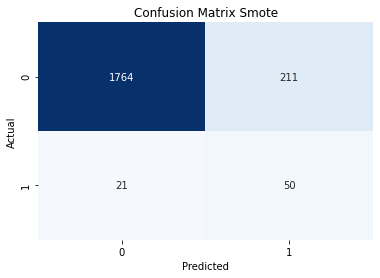

In [24]:
con_matrix_3 = confusion_matrix(y_test, y_pred_smote)

sns.heatmap(con_matrix_3, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Smote")
plt.show()

In [25]:
print(classification_report(y_test, y_pred_smote, target_names=["No Bankrupt", "Bankrupt"]))

              precision    recall  f1-score   support

 No Bankrupt       0.99      0.89      0.94      1975
    Bankrupt       0.19      0.70      0.30        71

    accuracy                           0.89      2046
   macro avg       0.59      0.80      0.62      2046
weighted avg       0.96      0.89      0.92      2046



The results for the smote method to oversample are pretty similar to the random oversampler meethod before. It is predicting less incorrect no bankrupt examples but it is also correctly predicting slightly less bankrupt examples.

### Dimensionality Reduction using PCA

In [26]:
X_train_pca, X_test_pca = pca(X_train_os, X_test)


X_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,1.711525,14.640264,-16.887861,10.935634,-7.934910,-6.449780,3.327742,2.018684,7.894798,-4.703748,1.418295,-0.141848,1.245713,-4.891552,-5.692696,0.528487,-6.018227,-2.140306,7.599238,4.329254,-4.717268,-9.003308,14.490867,0.326792,-1.689207,-3.241044,-3.223812,-1.308619,6.166898,-5.316462,0.565240,-3.124106,-0.419171,1.020694,-2.621857,0.314825,-4.139598,0.576752
1,-1.529405,-3.315710,1.560849,0.145023,0.469856,0.467604,-0.242473,-0.221373,0.859914,0.225825,0.879706,0.179978,-0.156774,-0.337776,0.200395,0.184148,-0.455593,0.316662,-0.304466,-0.842026,-0.365320,0.824741,-0.062594,-0.150009,0.188012,0.881565,-0.319539,-0.701536,1.088746,0.733217,-0.975996,-1.500918,-0.363317,-0.432827,-0.505612,-0.905327,1.001975,0.010443
2,-2.161061,-5.343221,2.440172,0.557576,1.316674,0.021489,2.516431,0.662453,1.199346,0.871927,1.411245,1.258364,0.547875,0.405065,0.753688,0.370914,-0.200668,0.447529,-0.197697,-0.301184,0.557613,0.631005,-0.086190,-0.611007,-0.510013,0.777707,0.017874,-0.042927,0.827282,0.265752,-1.063469,-0.484397,-0.901558,-0.359510,-0.688581,1.004418,-0.308331,-0.560659
3,-0.759695,-0.675375,0.275162,-0.091519,-0.764313,0.741942,-2.250180,-0.473925,0.325566,0.229420,1.590687,0.275214,-0.441696,1.700130,0.353992,-0.059139,-1.679426,-0.445440,0.297257,-0.685920,-1.030395,0.731067,-0.053746,0.462679,-1.020204,2.477314,-0.349244,0.645360,1.184954,0.470498,0.855075,-2.902997,1.201093,-0.939503,-1.012156,-1.402835,0.673917,0.962730
4,-1.174101,-2.021440,0.627195,-0.299475,-0.113088,0.132594,0.619857,-0.021431,-0.909768,-1.296537,-1.147442,-0.798213,-0.567009,-0.359103,-0.867519,-0.138057,0.188164,-0.196512,0.489360,0.447844,0.110557,-0.561710,-0.172700,0.429389,0.447957,-0.587368,0.353255,0.035531,-0.456987,0.743198,-0.415793,1.191834,-0.533923,0.330757,0.477299,-0.908557,-1.013997,0.287500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,0.939878,1.994310,-2.405509,-0.737408,-2.790788,-0.142733,-1.412356,0.004876,-3.220095,-1.012819,-4.473104,3.831163,7.694985,0.713633,-0.397317,-0.013685,0.202745,-0.560781,0.952175,-0.237170,-0.178607,-0.200170,-0.337705,0.060853,-0.401818,0.614413,-0.110114,-0.146221,0.165106,-0.057476,0.515293,0.545675,0.837647,0.064401,-0.148000,-0.357221,-0.023378,-0.320696
9244,-1.019753,0.259196,-1.177925,-0.626607,-0.816902,-0.981606,1.349408,0.141028,0.562145,-1.157596,-1.064887,0.036900,-0.437143,-1.615576,0.307949,0.690146,0.870674,-0.717020,0.445129,0.839266,0.206884,-0.770500,-0.704196,-0.422870,0.084252,-0.153555,0.194597,0.168662,-0.918906,0.061931,0.361821,0.430591,0.507606,-0.076561,-0.250959,0.572547,-0.236214,0.039897
9245,0.758865,3.808514,-2.792642,-0.304613,-1.389623,0.138236,-3.114606,-0.969485,0.673098,0.186862,0.300701,-0.044125,-0.935879,-0.622792,0.362208,-0.120525,-0.085743,-0.088931,-0.479285,0.081042,-0.542678,0.084789,-0.092239,0.566492,0.694572,-1.017869,-0.015664,0.107656,-0.080596,-0.425356,-0.256135,-0.722591,0.400549,-0.059361,-0.115560,0.481038,0.105933,-0.018833
9246,0.047188,-0.644995,0.405487,-0.502880,-0.626220,-0.175424,1.001617,0.797471,-3.278067,-1.145300,-1.161521,-0.517392,-0.625541,1.761408,-0.902687,-0.028524,-0.878989,0.260168,-0.102586,0.251303,0.830708,-0.535881,0.330950,-0.622960,0.218144,0.944109,-0.207694,0.228860,0.145250,-0.659041,0.908663,-0.372888,0.821543,-0.014092,0.521991,-0.537387,-0.245916,-0.030623


Using PCA for dimensionality reduction, we have the data down to just 38 columns with n_components set as 0.95. This will lose some of the data but will keep the higher variance features and the model will perform faster over a large dataset.

In [27]:
y_predict_pca = log_model(X_train_pca, X_test_pca, y_train_os.copy(), y_test)

In [28]:
print("Accuracy Score Using PCA: {}%".format(round(accuracy_score(y_test, y_predict_pca)*100, 2)))

Accuracy Score Using PCA: 85.87%


In [29]:
print("F1 for Logistic Regression: {}".format(round(f1_score(y_test, y_predict_pca),4)))

F1 for Logistic Regression: 0.2829


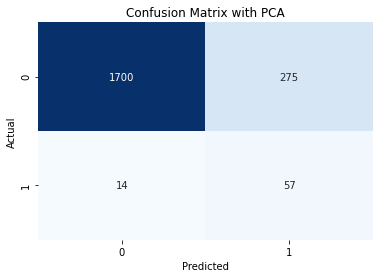

In [30]:
con_matrix_pca = confusion_matrix(y_test, y_predict_pca)

sns.heatmap(con_matrix_pca, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with PCA")
plt.show()

In [31]:
print(classification_report(y_test, y_predict_pca, target_names=["No Bankrupt", "Bankrupt"]))

              precision    recall  f1-score   support

 No Bankrupt       0.99      0.86      0.92      1975
    Bankrupt       0.17      0.80      0.28        71

    accuracy                           0.86      2046
   macro avg       0.58      0.83      0.60      2046
weighted avg       0.96      0.86      0.90      2046



With PCA the model is actually predicting more correct bankrupt examples. The f1 score is slightly worse than oversampling due to the model incorrectly predicting more bankrupts. In this case study it would likely be better to have more incorrect bankrupt examples in order for us to catch more bankrupts.